Name: Fadilah Nur Imani | Username: fadilahnurimani | Email: fadilahnurimani@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# import datasets
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-12-31 13:11:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.25MB/s    in 4m 34s  

2020-12-31 13:16:27 (1.12 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract zip file
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [4]:
# check rockpaperscissors
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'scissors', 'rps-cv-images', 'README_rpc-cv-images.txt']

In [5]:
# check rps-cv-image
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [6]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [9]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [10]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [11]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 30s - loss: 1.0535 - accuracy: 0.4221 - val_loss: 0.8871 - val_accuracy: 0.5312
Epoch 2/20
25/25 - 29s - loss: 0.5841 - accuracy: 0.7650 - val_loss: 0.3881 - val_accuracy: 0.8687
Epoch 3/20
25/25 - 29s - loss: 0.2861 - accuracy: 0.9062 - val_loss: 0.2494 - val_accuracy: 0.9375
Epoch 4/20
25/25 - 29s - loss: 0.1752 - accuracy: 0.9450 - val_loss: 0.1681 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 28s - loss: 0.1669 - accuracy: 0.9468 - val_loss: 0.1261 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 28s - loss: 0.1886 - accuracy: 0.9299 - val_loss: 0.3487 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 33s - loss: 0.2746 - accuracy: 0.8950 - val_loss: 0.2008 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 29s - loss: 0.1348 - accuracy: 0.9584 - val_loss: 0.2476 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 28s - loss: 0.1267 - accuracy: 0.9597 - val_loss: 0.1023 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 28s - loss: 0.1202 - accuracy: 0.9519 - val_loss: 0.1693 - val_accuracy: 0.9375
Epoch 11/

Saving 20200905_053853.jpg to 20200905_053853.jpg
20200905_053853.jpg
rock


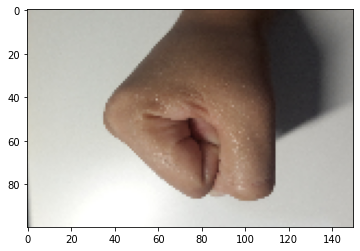

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')